# Diffusion Model in Pytorch to generate cosmological maps

Denoising Diffusion Probabilistic Model (DDPM) in Pytorch to generate astrophysical maps, trained with CAMELS simulations. 

Using DDPM Pytorch implementation from [Denoising Diffusion Pytorch](https://github.com/lucidrains/denoising-diffusion-pytorch). See also the annotated code by Niels Rogge, Kashif Rasul in Hugging Face, [The Annotated Diffusion Model](https://huggingface.co/blog/annotated-diffusion)

Download images from the [CAMELS Multifield dataset](https://camels-multifield-dataset.readthedocs.io/en/latest/access.html).

In this example we make use of 15k maps of the total mass field at $z=0$ from the LH SIMBA dataset: `Maps_Mtot_SIMBA_LH_z=0.00.npy`

In [3]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    channels = 1
)

diffusion = GaussianDiffusion(
    model,
    image_size = 256,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
)

In [11]:
trainer = Trainer(
    diffusion,
    '/home/tda/DiffusionCosmo/maps',
    train_batch_size = 2,
    train_lr = 8e-5,
    train_num_steps = 10000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False,                       # turn on mixed precision
    calculate_fid = True              # whether to calculate fid during training
)

# Uncomment to load previous milestone
trainer.load("7")

loading from version 1.5.2


In [12]:
trainer.train()

 70%|#######   | 7000/10000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.7198339655632723


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.7171334497907966


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.9701085477771088
training complete


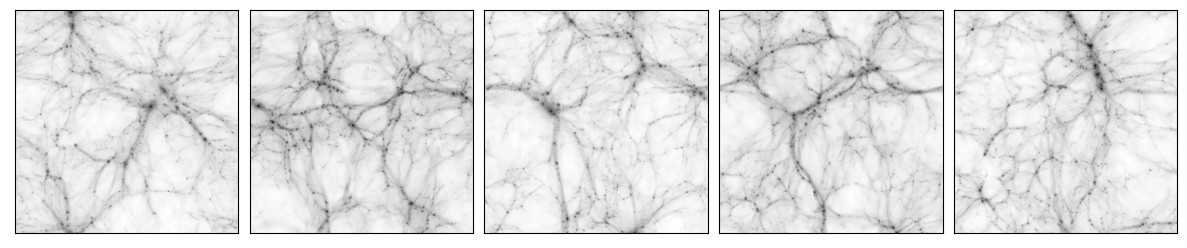

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

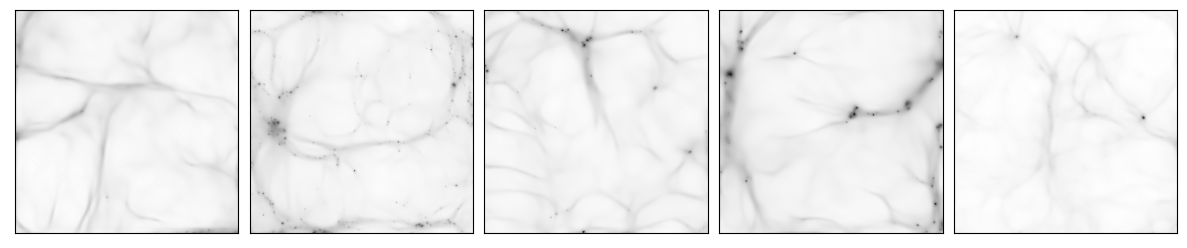

In [26]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# name of the file
fmaps = 'CAMELS_data/Maps_Mtot_SIMBA_LH_z=0.00.npy'
# read the data
dataset = np.load(fmaps)
# Transform to logarithmic mapping and normalize images
dataset = np.log10(dataset)
dataset = torch.tensor(dataset)

def sample_plot_image(sampled_images):
    
    num_images = sampled_images.shape[0]
    fig = plt.figure(figsize=(15,15))
    plt.axis('off')
    
    for j in range(num_images):
        plt.subplot(1, num_images, j+1)
        plt.xticks([], [])
        plt.yticks([], [])
        plt.imshow(sampled_images[j].detach().cpu().squeeze(),cmap="Greys")
    plt.subplots_adjust(wspace=0.05)
    plt.show()

num_images = 5
    
# Sampled images from dataset
sample_plot_image(dataset[:num_images])

# Sampled images from diffusion model (need to multiply by -1, why?)
sampled_images = -diffusion.sample(batch_size = num_images)
sample_plot_image(sampled_images)

In [15]:
"""
from torchvision import utils

num_images = 25
sampled_images = diffusion.sample(batch_size = num_images)
utils.save_image(sampled_images, "sampled_images.png", nrow = 5)
"""

'\nfrom torchvision import utils\n\nnum_images = 25\nsampled_images = diffusion.sample(batch_size = num_images)\nutils.save_image(sampled_images, "sampled_images.png", nrow = 5)\n'